In [565]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.neighbors import NearestNeighbors
from numpy.random import uniform
from random import sample
from scipy.stats import pearsonr
pd.set_option('display.max_columns', None)

#Import hopkins from pyclustertend
from pyclustertend import hopkins


In [566]:
#Create a dataframe with the data from Portland-2021.csv
df = pd.read_csv('cleaned_data_kmeans.csv')

In [567]:
# Print the summary statistics of the dataframe.
df.describe()

,Distance(mi),Crossing,Junction,Traffic_Calming,Visibility(mi),Sunrise_Sunset,Month,Day_of_Week,Hour,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Wind_Speed(mph),Precipitation(in),Weather_Condition_Cloudy,Weather_Condition_Fair,Weather_Condition_Fog,Weather_Condition_Rain,Weather_Condition_Snow,Weather_Condition_Thunder,Weather_Condition_Wintry Mix,cluster_location_0,cluster_location_1,cluster_location_2,cluster_location_3,cluster_location_4,cluster_location_5,cluster_location_6,cluster_location_7,cluster_location_8,cluster_location_9
count,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6896.000000,6871.000000,6895.000000,6902.000000,6872.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000
mean,0.948366,0.095045,0.178209,0.005795,2.210600,0.679368,7.226166,2.798319,12.643292,2.027528,56.463022,54.923010,66.614503,29.985183,7.249563,0.006001,0.457838,0.345262,0.007534,0.164155,0.013909,0.001884,0.009418,0.128369,0.214141,0.074761,0.031440,0.092872,0.101130,0.228774,0.029557,0.016662,0.082295
std,1.255037,0.293298,0.382716,0.075912,0.290759,0.466753,3.623051,1.881247,5.227248,0.233038,15.354296,17.148713,19.189054,0.211556,5.169419,0.021592,0.498255,0.475488,0.086478,0.370443,0.117122,0.043362,0.096593,0.334524,0.410255,0.263024,0.174517,0.290273,0.301523,0.420074,0.169373,0.128010,0.274834
min,0.004000,0.000000,0.000000,0.000000,0.693147,0.000000,1.000000,0.000000,0.000000,2.000000,23.000000,9.000000,12.000000,28.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.202000,0.000000,0.000000,0.000000,2.302585,0.000000,4.000000,1.000000,9.000000,2.000000,45.000000,42.000000,53.000000,29.860000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.551000,0.000000,0.000000,0.000000,2.302585,1.000000,8.000000,3.000000,13.000000,2.000000,54.000000,53.000000,71.000000,30.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.151000,0.000000,0.000000,0.000000,2.302585,1.000000,10.000000,4.000000,17.000000,2.000000,66.000000,66.000000,82.000000,30.120000,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26.005000,1.000000,1.000000,1.000000,2.302585,1.000000,12.000000,6.000000,23.000000,4.000000,115.000000,115.000000,100.000000,30.560000,32.000000,0.280000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [568]:
# show types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6902 entries, 0 to 6901
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Distance(mi)                  6902 non-null   float64
 1   Crossing                      6902 non-null   int64  
 2   Junction                      6902 non-null   int64  
 3   Traffic_Calming               6902 non-null   int64  
 4   Visibility(mi)                6902 non-null   float64
 5   Sunrise_Sunset                6902 non-null   int64  
 6   Month                         6902 non-null   int64  
 7   Day_of_Week                   6902 non-null   int64  
 8   Hour                          6902 non-null   int64  
 9   Severity                      6902 non-null   int64  
 10  Temperature(F)                6896 non-null   float64
 11  Wind_Chill(F)                 6871 non-null   float64
 12  Humidity(%)                   6895 non-null   float64
 13  Pre

In [569]:
#Remove rows with missing values
df = df.dropna()

In [570]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [571]:
hopkins(X, X.shape[0])

0.04929927764193579

In [572]:
#How many columns are there in the dataframe?
print('Number of columns in the dataframe: ', len(df.columns))

Number of columns in the dataframe:  33


### PCA

In [573]:
# Measure the correlation in the data’s dimensions
pca = PCA()
pca.fit(X)

PCA()

In [574]:
# Print the explained variance
print('Explained Variance', pca.explained_variance_)
print('Explained Variance Ratio', pca.explained_variance_ratio_)

Explained Variance [3.75684709e+00 2.16065184e+00 1.56735757e+00 1.49662569e+00
 1.39037664e+00 1.34247572e+00 1.31620000e+00 1.23401067e+00
 1.19259394e+00 1.14054855e+00 1.10289903e+00 1.06868462e+00
 1.06097659e+00 1.05432542e+00 1.03566497e+00 1.03093545e+00
 9.90090636e-01 9.58330484e-01 9.36552519e-01 9.20039533e-01
 8.90985845e-01 8.59096109e-01 7.99697358e-01 7.89566523e-01
 7.49060005e-01 6.30510539e-01 5.22379786e-01 4.58379200e-01
 3.42349760e-01 2.01670485e-01 4.92161002e-03 7.40907449e-31
 2.23371071e-31]
Explained Variance Ratio [1.13827280e-01 6.54647677e-02 4.74887704e-02 4.53456922e-02
 4.21264927e-02 4.06751610e-02 3.98790429e-02 3.73888197e-02
 3.61339498e-02 3.45570463e-02 3.34163179e-02 3.23796685e-02
 3.21461259e-02 3.19446046e-02 3.13792187e-02 3.12359209e-02
 2.99983793e-02 2.90360906e-02 2.83762483e-02 2.78759276e-02
 2.69956410e-02 2.60294260e-02 2.42297259e-02 2.39227756e-02
 2.26954840e-02 1.91035988e-02 1.58273863e-02 1.38882569e-02
 1.03727251e-02 6.110337

[Text(0, 0, '1'),
 Text(3, 0, '4'),
 Text(6, 0, '7'),
 Text(9, 0, '10'),
 Text(12, 0, '13'),
 Text(15, 0, '16'),
 Text(18, 0, '19'),
 Text(21, 0, '22'),
 Text(24, 0, '25'),
 Text(27, 0, '28'),
 Text(30, 0, '31')]

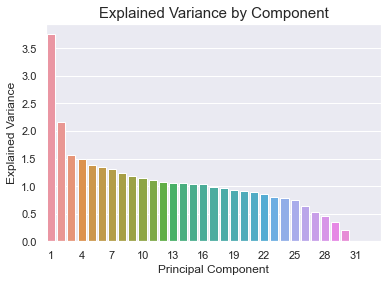

In [575]:
# make a list of 1 to 33
list_of_features = list(range(1,34))
indices_to_show = list(range(0, 33, 3))


# Explained Variance by Component
barplot = sns.barplot(x=list_of_features, y=pca.explained_variance_)
barplot.set_title("Explained Variance by Component", fontsize = 15)
barplot.set_ylabel("Explained Variance")
barplot.set_xlabel("Principal Component")

barplot.set_xticks(indices_to_show)
barplot.set_xticklabels([list_of_features[i] for i in indices_to_show])


Text(0.5, 0, 'Principal Components')

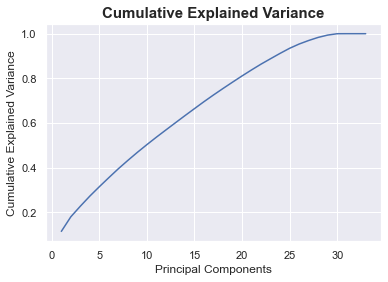

In [576]:
# Cumulative Explained Variance
lineplot =sns.lineplot(x=list_of_features, y=np.cumsum(pca.explained_variance_ratio_))
lineplot.set_title("Cumulative Explained Variance", fontsize = 15, fontweight = 'bold')
lineplot.set_ylabel("Cumulative Explained Variance")
lineplot.set_xlabel("Principal Components")

In [577]:
pca_2 = PCA(n_components=2)
components = pca_2.fit_transform(X)
hopkins(components, components.shape[0])

0.02195222697268582

Text(0, 0.5, 'Principal Component 2')

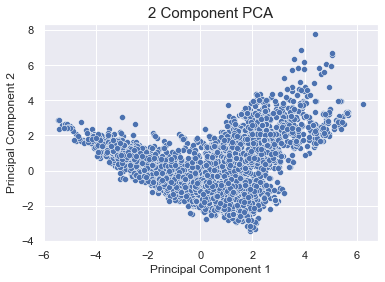

In [578]:
scatterplot_pca =sns.scatterplot(x=components[:, 0], y=components[:, 1], palette='Set1')
scatterplot_pca.set_title("2 Component PCA", fontsize = 15)
scatterplot_pca.set_xlabel("Principal Component 1")
scatterplot_pca.set_ylabel("Principal Component 2")

In [579]:
correlation, pvalue = pearsonr(components[:, 0], components[:, 1])
print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: -2.846030702774449e-18


### K-Means Loop

In [580]:

df = pd.read_csv('cleaned_data_kmeans.csv')
df = df[['Distance(mi)', 'Visibility(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)', 'Precipitation(in)']]
df.dropna(inplace=True)

scaler = StandardScaler()
X = scaler.fit_transform(df)
hopkins(X, X.shape[0])

0.03708573932807362

In [581]:
cut_off = 0.5
max_features = 3
min_k = 2
max_k = 8

def select_kmeans_features(df, min_k, max_k, max_features, kmeans_kwargs):
    df_cols = list(df)
    scores_for_each_k = []
    features_for_each_k = {}

    for k in range(min_k, max_k+1):
        selected_features = []
        while len(selected_features) < max_features:
            scores = []
            for col in df_cols:
                selected_columns = selected_features + [col]
                kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
                kmeans.fit(df[selected_columns])
                predictions = kmeans.predict(df[selected_columns])
                scores.append(silhouette_score(df[selected_columns], predictions))

            if not scores:
                break

            selected_feat = df_cols[np.argmax(scores)]
            selected_features.append(selected_feat)
            df_cols.remove(selected_feat)

        if scores:
            scores_for_each_k.append(max(scores))
        features_for_each_k[k] = selected_features

    max_score = max(scores_for_each_k)
    best_k = scores_for_each_k.index(max_score) + min_k
    selected_features = features_for_each_k[best_k]
    return best_k, selected_features

def cluster_data(df, best_k, selected_features, kmeans_kwargs):
    kmeans = KMeans(n_clusters=best_k, **kmeans_kwargs)
    kmeans.fit(df[selected_features])
    clusters = kmeans.predict(df[selected_features])
    return clusters

kwargs = {
    "init": "random",
    "n_init": 20,
    "max_iter": 1000,
    "random_state": 1984
}

best_k, selected_features = select_kmeans_features(df, min_k, max_k, max_features, kwargs)
clusters = cluster_data(df, best_k, selected_features, kwargs)

print(f"Best k: {best_k}") #Shows that the optimal number of clusters is 2. 

Best k: 2


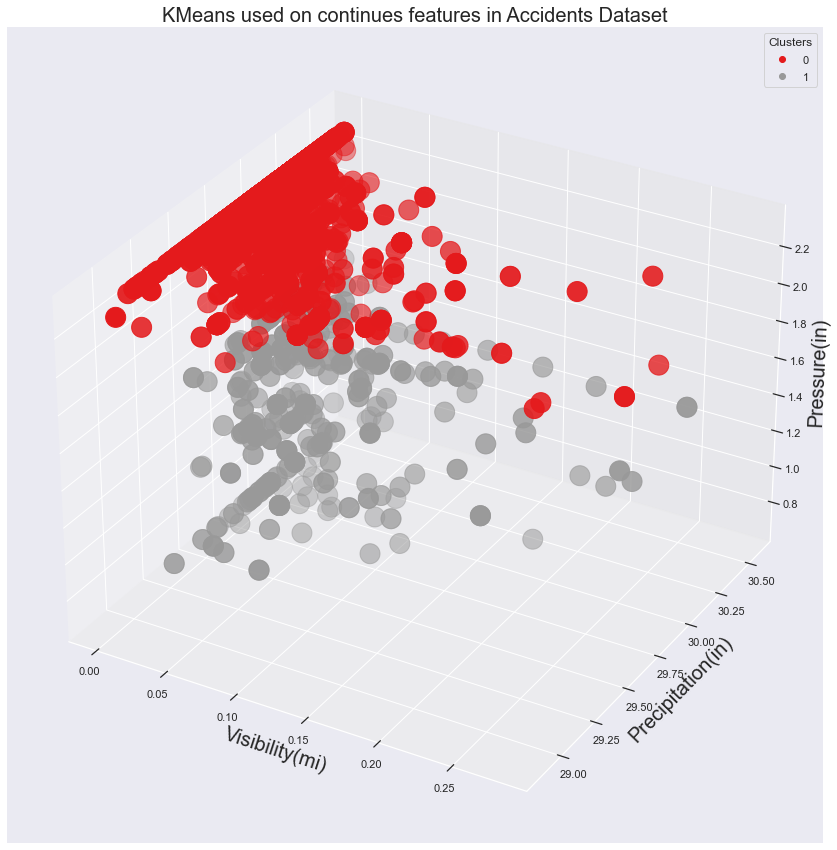

In [582]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
axes = fig.add_subplot(111, projection='3d')

scatter = axes.scatter3D(df[selected_features[1]], df[selected_features[2]], df[selected_features[0]], c=clusters, cmap='Set1', s=400)

axes.set_xlabel(selected_features[0], fontsize=20)
axes.set_ylabel(selected_features[1], fontsize=20)
axes.set_zlabel(selected_features[2], fontsize=20)
plt.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")

plt.title('KMeans used on continues features in Accidents Dataset', fontsize=20)
plt.show()